In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from modules.get_df_for_preprocessing import GetDfForPreprocessing

## Local modules import

In [2]:
from modules.utility import get_csv_data
from modules.create_viz import outliers_plot

## Read data

In [3]:
# read train data
train = get_csv_data(path='data/train.csv', version='v1')
store = get_csv_data(path='data/store.csv', version='v1')

Reading data from dvc source....
Reading completed, data returned
Reading data from dvc source....
Reading completed, data returned


## Get data info

In [4]:
#training data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
#training data description
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
#store data info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
#store data description
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Merge training dataframe with store dataframe

In [8]:
# Merging store and train data set
store_train_df = store.merge(train,on=["Store"],how="inner")

## Get info and clean

In [9]:
train_prep = GetDfForPreprocessing(store_train_df)

In [10]:
train_prep.print_df_info()

Retrieving info from data...
The number of colum(s): 18.
The column(s) is/are : Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, DayOfWeek, Date, Sales, Customers, Open, Promo and SchoolHoliday
 
The total number of rows: 1017209 
The number of columns having missing value(s): 6 
The number of rows with missing value(s) in [CompetitionDistance]: 2642
The number of rows with missing value(s) in [CompetitionOpenSinceMonth]: 323348
The number of rows with missing value(s) in [CompetitionOpenSinceYear]: 323348
The number of rows with missing value(s) in [Promo2SinceWeek]: 508031
The number of rows with missing value(s) in [Promo2SinceYear]: 508031
The number of rows with missing value(s) in [PromoInterval]: 508031


In [11]:
train_prep.drop_cols_abv_na_trshld(threshold = 0.35)


Comparing threshold with fraction of missing values ...

Retrieving columns to be dropped ...

Columns to be dropped : ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

The column(s) to be excluded is/are [[]]

Dropping columns with missing values above the threshold ...

Dropping columns completed

Removing dropped columns from memory...

Removal of dropped columns from memory completed


In [12]:
train_inter_clean = train_prep.fill_missing()


The colums with missing values to be filled are ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']

The column(s) to be excluded is/are ['CompetitionOpenSinceMonth']

Filling missing values in CompetitionDistance

Filling missing values in CompetitionOpenSinceYear

Filling missing values comppleted


### Fill null values in CompetitionOpenSinceMonth

In [13]:
train_inter_clean.CompetitionOpenSinceMonth = train_inter_clean.CompetitionOpenSinceMonth.ffill().bfill()

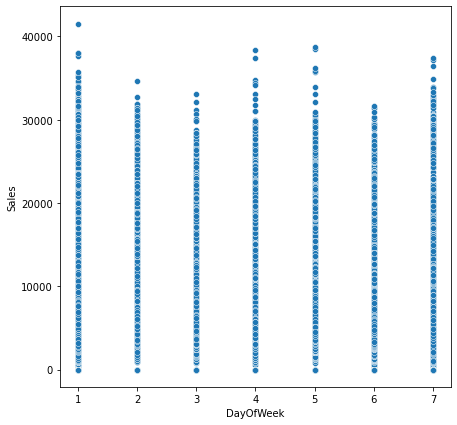

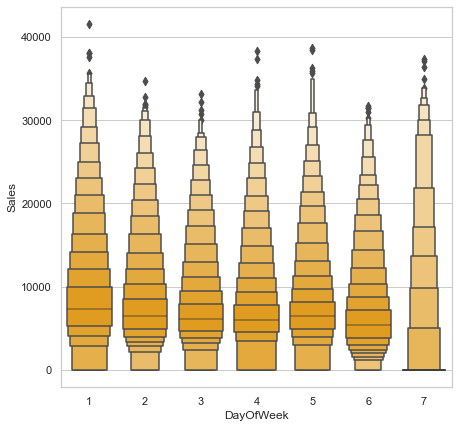

In [14]:
outliers_plot(train_inter_clean, {'x': "DayOfWeek", 'y': "Sales"}, 2)

### Remove outliers in sales

In [15]:
train_inter_clean["Sales"]=train_inter_clean["Sales"].apply(lambda x: 30000 if x>30000 else x)

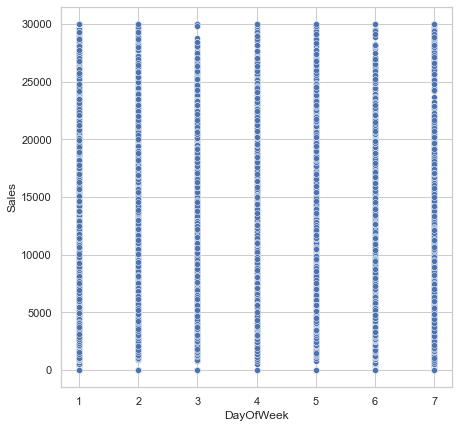

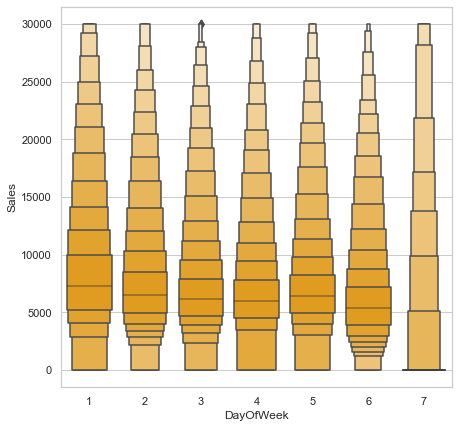

In [16]:
outliers_plot(train_inter_clean, {'x': "DayOfWeek", 'y': "Sales"}, 2)

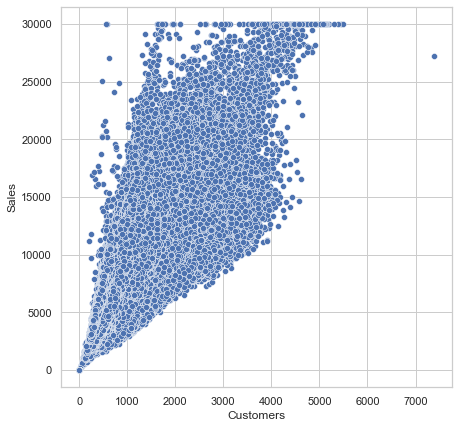

In [17]:
outliers_plot(train_inter_clean, {'x': "Customers", 'y': "Sales"}, 0)

### Remove outliers in customers

In [18]:
train_inter_clean["Customers"]=train_inter_clean["Customers"].apply(lambda x: 5000 if x>5000 else x)

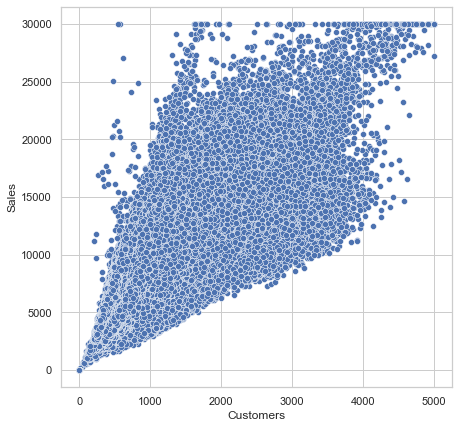

In [19]:
outliers_plot(train_inter_clean, {'x': "Customers", 'y': "Sales"}, 0)

In [20]:
from modules.prep_data_for_model import get_target, PrepareForModel

In [21]:
prep_d = PrepareForModel(df=train_inter_clean)

In [22]:
train, test, val = prep_d.split(train = 0.7, test=0.3, validation=0)

Spliting data into train, test, and validation sets...
Spliting data into train, test, and validation sets completed. The data is returned in the order of:
train_df, test_df, val_df


In [23]:
train_d,train_t = get_target(df=train, target_col='Sales')
test_d,test_t = get_target(df=test, target_col='Sales')

Retrieving the target variable...
Retrievial of the target variable completed. The data is returned in the order of:
data, target
Retrieving the target variable...
Retrievial of the target variable completed. The data is returned in the order of:
data, target


In [24]:
from sklearn.pipeline import Pipeline
from modules.xgboost_modeller import XgModeller
from modules.date_handler import DateExtract
from modules.treat_categorical import EncodeCategorical

In [25]:
d_handler = DateExtract(train_d)
train_df = d_handler.extract_all()

2021-08-08 15:56:36,779 - DateExtraction initialized...
2021-08-08 15:56:37,439 - Retrieving year from date...
2021-08-08 15:56:37,609 - Retrieval of year completed
2021-08-08 15:56:37,611 - Retrieving month from date...
2021-08-08 15:56:37,790 - Retrieval of month completed
2021-08-08 15:56:37,791 - Retrieving day of week from date...
2021-08-08 15:56:38,034 - Retrieval of day of week completed
2021-08-08 15:56:38,036 - Retrieving day from date...
2021-08-08 15:56:38,254 - Retrieval of day completed
2021-08-08 15:56:38,256 - Retrieving month from date...
2021-08-08 15:56:38,460 - Retrieval of month completed
2021-08-08 15:56:38,462 - Retrieving seasons from date...
2021-08-08 15:56:38,745 - Retrieval of seasons from date completed
2021-08-08 15:56:38,747 - Retrieving weekends from date...
2021-08-08 15:56:39,233 - Retrieval of weekends from date completed
2021-08-08 15:56:39,261 - Retrieving weekdays from date...
2021-08-08 15:56:39,826 - Retrieval of weekdays from date completed
2021

In [26]:
d_handler = DateExtract(test_d)
test_df = d_handler.extract_all()

2021-08-08 15:56:41,730 - DateExtraction initialized...
2021-08-08 15:56:42,066 - Retrieving year from date...
2021-08-08 15:56:42,141 - Retrieval of year completed
2021-08-08 15:56:42,144 - Retrieving month from date...
2021-08-08 15:56:42,231 - Retrieval of month completed
2021-08-08 15:56:42,233 - Retrieving day of week from date...
2021-08-08 15:56:42,325 - Retrieval of day of week completed
2021-08-08 15:56:42,327 - Retrieving day from date...
2021-08-08 15:56:42,427 - Retrieval of day completed
2021-08-08 15:56:42,429 - Retrieving month from date...
2021-08-08 15:56:42,531 - Retrieval of month completed
2021-08-08 15:56:42,533 - Retrieving seasons from date...
2021-08-08 15:56:42,676 - Retrieval of seasons from date completed
2021-08-08 15:56:42,678 - Retrieving weekends from date...
2021-08-08 15:56:42,912 - Retrieval of weekends from date completed
2021-08-08 15:56:42,928 - Retrieving weekdays from date...
2021-08-08 15:56:43,166 - Retrieval of weekdays from date completed
2021

In [27]:
train_df.drop(columns=['Date'], inplace=True)
test_df.drop(columns=['Date'], inplace=True)

In [28]:
en_cats = EncodeCategorical(df=train_df)
en_cats.get_cat_cols()
train_all_num_df = en_cats.encode_cats()

2021-08-08 15:56:44,438 - EncodeCategorical initialized...
2021-08-08 15:56:44,512 - Retrieving categorical columns from Dataframe...
2021-08-08 15:56:44,802 - Retrieval of categorical columns from Dataframe completed
2021-08-08 15:56:44,828 - Encoding categorical columns from Dataframe...
2021-08-08 15:56:44,914 - Encoding StoreType column...
2021-08-08 15:56:45,517 - Encoding Assortment column...
2021-08-08 15:56:45,666 - Encoding StateHoliday column...
2021-08-08 15:56:45,917 - Encoding Season column...
2021-08-08 15:56:46,081 - Encoding categorical columns from Dataframe completed


In [29]:
en_cats = EncodeCategorical(df=test_df)
en_cats.get_cat_cols()
test_all_num_df = en_cats.encode_cats()

2021-08-08 15:56:46,112 - EncodeCategorical initialized...
2021-08-08 15:56:46,281 - Retrieving categorical columns from Dataframe...
2021-08-08 15:56:46,496 - Retrieval of categorical columns from Dataframe completed
2021-08-08 15:56:46,610 - Encoding categorical columns from Dataframe...
2021-08-08 15:56:46,702 - Encoding StoreType column...
2021-08-08 15:56:46,890 - Encoding Assortment column...
2021-08-08 15:56:46,989 - Encoding StateHoliday column...
2021-08-08 15:56:47,081 - Encoding Season column...
2021-08-08 15:56:47,150 - Encoding categorical columns from Dataframe completed


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [31]:
standsc = StandardScaler()

In [32]:
train_scaled_df = pd.DataFrame(standsc.fit_transform(train_all_num_df), columns=train_all_num_df.columns)
test_scaled_df = pd.DataFrame(standsc.fit_transform(test_all_num_df), columns=test_all_num_df.columns)

In [33]:
mdlr = XgModeller()

2021-08-08 15:56:48,549 - XgModeller initialized...


In [34]:
base, best = mdlr.gridsearch_model(X=train_scaled_df, Y=train_t, output=True)

2021-08-08 15:56:48,590 - Randomized+SearchCV in process, 'n_estimators'=15 ...


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95; total time=  10.4s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95; total time=   9.7s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95; total time=   9.8s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95; total time=  10.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95; total time=   9.7s
[CV] END colsample_bytree=0.4, gamma=0, learning_

[CV] END colsample_bytree=0.6, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6; total time=  11.7s
[CV] END colsample_bytree=0.6, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6; total time=  11.7s
[CV] END colsample_bytree=0.6, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6; total time=  12.0s
[CV] END colsample_bytree=0.6, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6; total time=  11.9s
[CV] END colsample_bytree=0.6, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6; total time=  12.2s


2021-08-08 16:06:24,047 - RandomizedSearchCV in completed
2021-08-08 16:06:24,052 - Best_estimator in retrieved


In [35]:
best_params = best.get_xgb_params()

In [36]:
best.fit(train_scaled_df, train_t)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=6, nthread=6, num_parallel_tree=1,
             random_state=42, reg_alpha=0.01, reg_lambda=1e-05,
             scale_pos_weight=1, seed=42, subsample=0.6, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

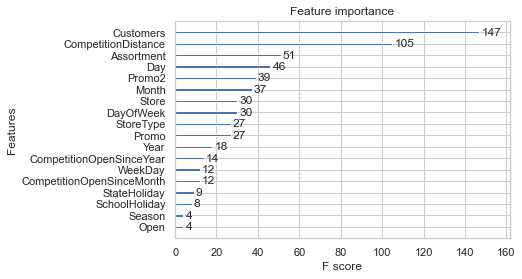

In [37]:
xgb.plot_importance(best)

2021-08-08 16:06:39,779 - Feature importance plotting in process...


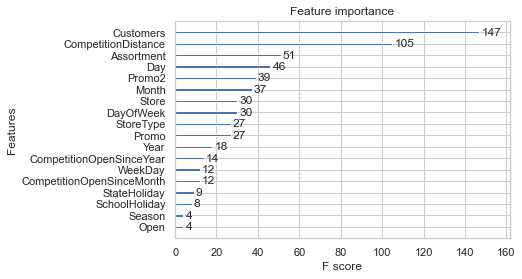

In [38]:
mdlr.best_feature_imp()

In [39]:
y_predicted = best.predict(test_scaled_df)

In [40]:
rms = mean_squared_error(test_t, y_predicted, squared=False)

In [41]:
from datetime import datetime as dt
import pickle

In [42]:
name = dt.now().strftime('date_%Y_%m_%d_time_%H_%M_%S')+'_rms_'+('%.6f' % rms).rstrip('0').rstrip('.')

In [43]:
pickle.dump(best, open('models'+'/'+name, "wb"))

In [45]:
train_df[['WeekDay','DayOfWeek', 'Store']]

,WeekDay,DayOfWeek,Store
76435,1,1,84
923026,6,6,1013
731180,5,5,803
790350,4,4,867
252134,6,6,278
...,...,...,...
733831,6,6,806
681747,3,3,749
554668,4,4,608
79255,7,7,87


In [49]:
best_params

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'gamma': 0.1,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 6,
 'monotone_constraints': '()',
 'n_jobs': 6,
 'num_parallel_tree': 1,
 'random_state': 42,
 'reg_alpha': 0.01,
 'reg_lambda': 1e-05,
 'scale_pos_weight': 1,
 'subsample': 0.6,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'nthread': 6,
 'seed': 42}

In [ ]:
base.get_xgb_params()